<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Чтение-данных-из-файла" data-toc-modified-id="Чтение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Чтение данных из файла</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ продуктов игровой индустрии и выявление закономерностей

**Краткое описание**  

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В нашем распоряжении данные за период до 2016 год.

**Цель**  

Выявить определяющие успешность игры закономерности. Чтобы получить возможность сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Структура исследования**  
1. Чтение данных из файла
2. Подготовка данных
3. Исследовательский анализ
4. Портрет пользователя каждого региона
5. Проверка статистических гипотез
6. Общий вывод

**Использование дополнительных модулей и библиотек**  
- `pandas` – редактор баз данных  
- `numpy` – математические преобразования  
- `matplotlib`, `seaborn` – построение графиков  
- `scipy` – работа со статистическими функциями

## Чтение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

In [2]:
# чтение данных из файла
df = pd.read_csv('games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Расшифровка наименований столбцов**  
`Name` — название игры  
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры  
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
`EU_sales` — продажи в Европе (миллионы проданных копий)  
`JP_sales` — продажи в Японии (миллионы проданных копий)  
`Other_sales` — продажи в других странах (миллионы проданных копий)  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score`  — оценка пользователей (максимум 10)  
`Rating`  — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Подготовка данных

**п. 2.1 Приведение названий столбцов к нижнему регистру**

In [3]:
# приведение названий столбцов датафрейма к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**п. 2.2 Приведение данных к нужному типу**

In [4]:
# общая информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропуски данных фиксируются в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score` и `rating`.

In [5]:
# столбец 'year_of_release' содержит ссылку только на год
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Столбец `year_of_release` необходимо привести к типу данных `int`, т.к. тип `datetime` в данном случае избыточен. Полноценно это можно будет сделать только после обработки пропусков, т.к. наличие объекта `NaN` будет удерживать тип данных `float`.

In [6]:
# столбец 'critic_score' содержит только целые числа (а также пропуски или объекты NaN)
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Столбец `critic_score` необходимо привести к типу данных `int`. Полноценно это можно будет сделать только после обработки пропусков, т.к. наличие объекта `NaN` будет удерживать тип данных `float`.

In [7]:
# столбец 'user_score' содержит только числа с запятой (вещественные числа), а также пропуски (или объекты NaN)
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Столбец `user_score` необходимо привести к типу данных `float`. Полноценно это можно будет сделать только после обработки пропусков, т.к. наличие строкового значения `tbd` будет удерживать тип данных `object`.

**п. 2.3 Обработка пропусков**

**Столбец `name`**

In [8]:
# проверка пропусков в столбце 'name'
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце `name` пропуски фиксируются в двух строках. Кроме того, следует отметить, что именно для этих строк информация  полностью пропущена еще в 4 столбцах (`genre`, `critic_score`, `user_score` и	`rating`) из 11.  

Таким образом оправдано удаление этих строк.

In [9]:
# удаление пропусков в столбце 'name'
df.dropna(subset=['name'], inplace=True)

**Столбец `year_of_release`**

In [10]:
# проверка пропусков в столбце 'year_of_release'
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


В названиях некоторых игр содержится указание на год. Для извлечения этой информации составим регулярное выражение.

In [11]:
# создаем дополнительный столбец 'temp_regex' с результатом, который возвращает регулярное выражение
# выполняется поиск 4 последовательных цифр в названии игры
df['temp_regex'] = df['name'].str.extract('(\d{4})')


# выполним замену пропусков, если извлечен год из названия игры в столбце 'name'
df['year_of_release'] = df.apply(lambda row: row['temp_regex'] if
                                 pd.isna(row['year_of_release']) and # в столбце 'year_of_release' пропуск
                                 pd.notna(row['temp_regex']) else    # в дополнительном столбце 'temp_regex' содержится год
                                 row['year_of_release'], axis=1)


# удаляем дополнительный столбец 'temp_regex'
df.drop('temp_regex', axis=1, inplace=True)

In [12]:
# проверка пропусков в столбце 'year_of_release'
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.0,0.21,78.0,6.6,E10+


Год релиза для оставшихся игр восстановить по данным имеющейся таблицы невозможно. Требуется дополнительная справочная информация из внешних источников.  

Удаляем строки, в которых фиксируются пропуски для столбца `year_of_release`.

In [13]:
# удаление пропусков в столбце 'year_of_release'
df.dropna(subset=['year_of_release'], inplace=True)

Приводим данные в столбце `year_of_release` к типу данных `int`.

In [14]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'].astype('int'), format='%Y')
df['year_of_release'] = df['year_of_release'].dt.year

**Столбец `genre`**

Строки, в том числе с пропусками в этом столбце, были удалены на предыдущих этапах предварительной обработки.

**Столбец `critic_score`**

Для заполнения пропусков в данном столбце нужно использовать внешние источники данных. Оставляем данные без изменений.

Ячейки с отсутствующими данные в этом столбце составляют приблизительно половину строк от общего их количества. Удаление этой информации существенно повлияет на результаты исследования.

**Столбец `user_score`**

Сокращение «tbd» (to be decided / to be determined) равнозначно пропуску (или отсутствию) данных. Таким образом, эти ячейкам в датафрейме необходимо присвоить значением `NaN`. 

In [15]:
# выполним замену сокращения 'tbd'
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [16]:
# приведем столбец к численному типу 'float' (по причине наличия в столбце значения NaN)
df['user_score'] = df['user_score'].astype('float')

**Столбец `rating`**

Восстановление информации для заполнения пропусков лучше всего проводить по данным внешних источников. Оставляем пропуски без изменения.

Ячейки с отсутствующими данные в этом столбце составляют приблизительно половину строк от общего их количества. Удаление этой информации существенно повлияет на результаты исследования.

In [17]:
# проверяем отсутствие дубликатов
df.duplicated().sum()

0

**п. 2.4 Расчет суммарных продаж во всех регионах**

In [18]:
# суммируем продажи по столбцам 'na_sales', 'eu_sales', 'jp_sales' и 'other_sales'
df['total_sales'] = df.loc[:,['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Выводы

При работе с данными в данном разделе были выполнены следующие основные пункты: приведение названий столбцов к нижнему регистру, заполнение пропусков и удаление строк.  

Заполнение пропусков было выполнено для столбца `year_of_release`. Суммарно было удалено 254 строки, что составило приблизительно 1,5% потери данных от общего количества и не должно повлиять на общий результат.  

Обработка пропусков для столбцов `critic_score`, `user_score` и `rating` не проводилась, т.к. для этого необходимо обращаться к внешним источникам данных.

## Исследовательский анализ

**п. 3.1 Годовой объем выпуска игр**

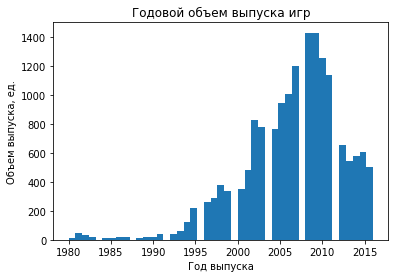

In [19]:
# построим гистограмму для столбца 'year_of_release'
plt.hist(df['year_of_release'], bins=45)

plt.title('Годовой объем выпуска игр')
plt.xlabel('Год выпуска')
plt.ylabel('Объем выпуска, ед.')

plt.show()

Пик популярности игр для рассматриваемых платформ пришелся на период с 2008 по 2010 годы. Последующее резкое (практически 2х кратное) падение, скорее всего, связано с бурным развитием индустрии игр для мобильных устройств.

**п. 3.2 Динамика продаж по платформам**

In [20]:
# отбираем 10 платформ с наибольшими суммарными продажами
df_groupped = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
df_groupped

platform
PS2     1247.28
X360     961.30
PS3      931.34
Wii      891.18
DS       802.79
PS       727.58
PS4      314.14
GBA      312.88
PSP      290.34
3DS      257.81
Name: total_sales, dtype: float64

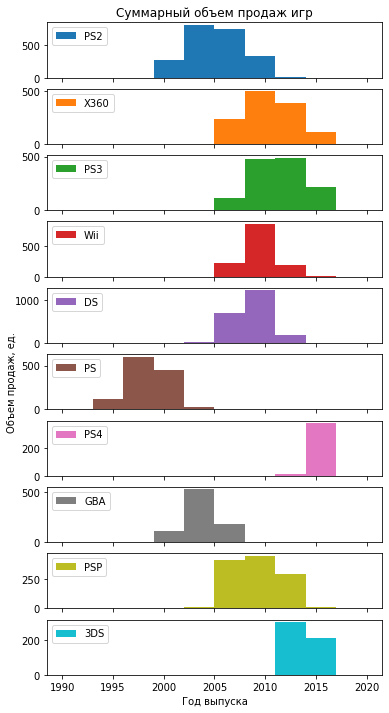

In [21]:
# строим гистограмму для каждой платформы
fig, ax = plt.subplots(10, sharex=True, figsize=(6, 12))
colors = plt.rcParams["axes.prop_cycle"]()

for row in range(10) :
    item = df_groupped.keys()
    c = next(colors)["color"]
    ax[row].hist(df.query('platform == @item[@row]')['year_of_release'],
                 range=(1990, 2020), 
                 label=df_groupped.keys()[row],
                 color=c)
    ax[row].legend(loc='upper left')
    

ax[0].set_title('Суммарный объем продаж игр')
ax[5].set_ylabel('Объем продаж, ед.')
ax[9].set_xlabel('Год выпуска')

plt.show()

Визуально можно определить, что средний срок активного присутствия игровой платформы на рынке составляет приблизительно 8-12 лет.  

Стоит отметить, что на рынке в рамках одного временного интервала постоянно присутствуют несколько платформ. Это говорит о конкурентной борьбе и противодействует монополизации.

**п. 3.3 Выбор актуального периода**

Принимаем актуальный период равным средней продолжительности активной фазы присутствия игровой платформы на рынке услуг. В данном случае это 11 лет, т.к. из построенной на предыдущем этапе визуализации следует, что жизненный цикл 5 платформ из 10 топовых по продажам начинается с отметки 2006 год.

**п. 3.4 Датафрей для дальнейшего исследования**

In [22]:
# формирование датафрейма с учетом установленного временного интервала 2006–2016 годы
df_selected = df.query('2006 <= year_of_release <= 2016')

# вывод временного интервала
df_selected['year_of_release'].sort_values().unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

**п. 3.5 Лидеры продаж (рост и падение)**

In [23]:
# формируем сводную таблицу
df_selected_pivot = pd.pivot_table(df_selected, index='platform',
                                   columns='year_of_release',
                                   values='total_sales',
                                   aggfunc='sum')


df_selected_pivot.T

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2006,NaN,NaN,119.81,5.28,11.26,2.85,106.46,20.96,NaN,55.32,NaN,137.15,NaN,51.62,10.04,NaN
2007,NaN,0.02,146.94,3.40,0.27,9.28,75.99,73.19,NaN,46.93,NaN,152.77,NaN,95.42,0.55,NaN
2008,NaN,0.04,145.32,NaN,NaN,12.42,53.90,118.52,NaN,34.56,NaN,171.32,NaN,135.26,0.18,NaN
2009,NaN,NaN,119.54,NaN,NaN,16.91,26.40,130.93,NaN,38.58,NaN,206.97,NaN,120.29,NaN,NaN
2010,NaN,NaN,85.02,NaN,NaN,24.28,5.64,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN,NaN
2011,63.20,NaN,26.18,NaN,NaN,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.89,NaN,NaN
2012,51.36,NaN,11.01,NaN,NaN,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN,NaN
2013,56.57,NaN,1.54,NaN,NaN,12.73,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,NaN,18.96
2014,43.76,NaN,NaN,NaN,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,NaN,54.07


При таком транспонированном позиционировании сводного датафрейма `df_selected_pivot` хорошо видно, что некоторые платформы к концу рассматриваемого периода (т.е. на 2016 год) уже прекратили свое существование. Например: `DC`, `DS`,	`GBA`, `GC`, `PS2`, `PSP` и `XB`.  

Строки с этими данными можно удалить, т.к. они не окажут влияние на дельнейшее формирование прогноза.

In [24]:
# удаляем строки с неактуальной информацией
df_selected_pivot.drop(['DC', 'DS', 'GBA', 'GC', 'PS2', 'PSP', 'XB'], axis=0, inplace=True)
df_selected_pivot

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
PC,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.73,13.28,8.52,5.25
PS3,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSV,NaN,NaN,NaN,NaN,NaN,4.63,16.19,10.59,11.90,6.25,4.25
Wii,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,17.56,21.65,22.03,16.35,4.60
X360,51.62,95.42,135.26,120.29,170.03,143.89,99.74,88.58,34.74,11.96,1.52
XOne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.96,54.07,60.14,26.15


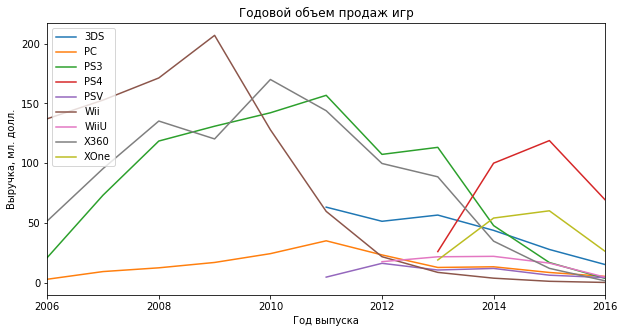

In [25]:
# визуализируем табличные данные из датафрейма 'df_selected_pivot'
df_selected_pivot.T.plot(figsize=(10, 5))

plt.legend(loc='upper left')
plt.title('Годовой объем продаж игр')
plt.xlabel('Год выпуска')
plt.ylabel('Выручка, мл. долл.')

plt.show()

Все платформы имеют нисходящий тренд. На предстоящий 2017 год можно было прогнозировать, что лидирующие позиции (при неизменном падении продаж) могли сохранить следующие платформы: `PS4`, `XOne` и `3DS`.  

Объем продаж по остальным платформам сходится воедино и тяготеет к прекращению присутствия на рынке.

**п. 3.6 Глобальные продажи игр в разбивке по платформам**

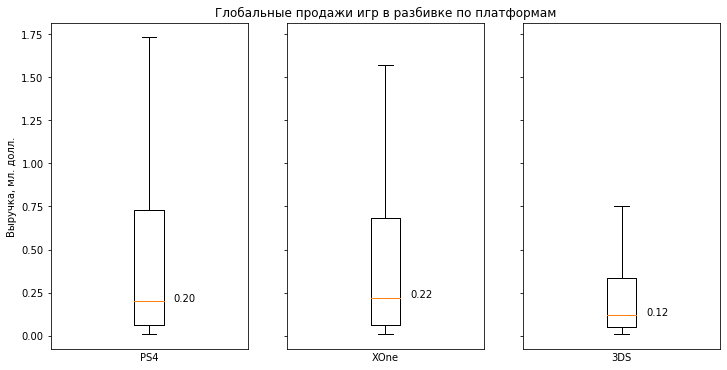

In [26]:
# строим диаграмму размаха для перспективных платформ 'PS4', 'XOne' и '3DS'
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12, 6))

list_platform = ['PS4', 'XOne', '3DS']

for item in range(len(list_platform)):
    bp = ax[item].boxplot(df_selected.query('platform == @list_platform[@item]')['total_sales'], showfliers=False)
    ax[item].set_xticks([])
    ax[item].set_xlabel(list_platform[item])
    
    # добавление значения медианы на диаграмму размаха
    x, y = bp['medians'][0].get_xydata()[1]
    text = '{:.2f}'.format(df_selected.query('platform == @list_platform[@item]')['total_sales'].median())
    ax[item].annotate(text, xy=(x + 0.05, y))


ax[1].set_title('Глобальные продажи игр в разбивке по платформам')
ax[0].set_ylabel('Выручка, мл. долл.')
        
plt.show()

Медианные значения выручки ближайших конкурентов – это платформы `PS4` и `XOne` примерно равны, а сами диаграммы размаха очень схожи. Ближайший соперник – это платформа `3DS`, отстаёт практически с 2х кратной разницей по медиане.

**п. 3.7 Влияние на продажи отзывов пользователей и критиков (внутри одной популярной платформы `PS4`)**

Построим диаграммы рассеяния, которые визуализируют влияние оценки критиков `critic_score` и пользователей `user_score` на общие продажи `total_sales`. Для анализа выберем платформу `PS4`, которая сохраняет лидерство по продажам.

In [27]:
# формируем датафрейм с данными по платформе 'PS4'
df_selected_PS4 = df_selected.query('platform == "PS4"')

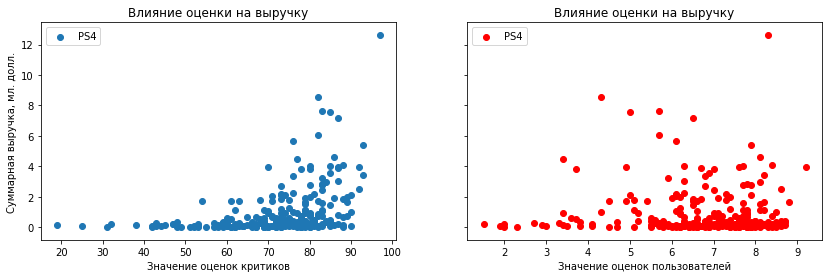

In [28]:
# выполняем визуализацию
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(14, 4))

ax[0].scatter(df_selected_PS4['critic_score'], df_selected_PS4['total_sales'], label='PS4')
ax[1].scatter(df_selected_PS4['user_score'], df_selected_PS4['total_sales'], label='PS4', c='red')


ax[0].set_title('Влияние оценки на выручку')
ax[1].set_title('Влияние оценки на выручку')
ax[0].set_ylabel('Суммарная выручка, мл. долл.')
ax[0].set_xlabel('Значение оценок критиков')
ax[1].set_xlabel('Значение оценок пользователей')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')


plt.show()

Оценки влияние на общие продажи. Можно отметить более строгую зависимость от оценок выше среднего (приблизительно 60 баллов и более) для критиков, тогда как оценки пользователей начинают хаотично поднимать продажи даже при значениях ниже среднего (приблизительно 3,5 балла и более).

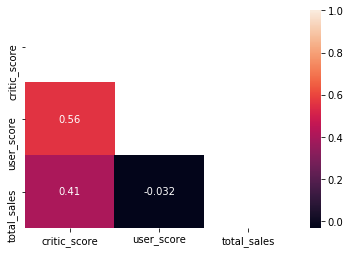

In [29]:
# определяем коэффициенты корреляции (платформа PS4)
corr = df_selected_PS4[['critic_score', 'user_score', 'total_sales']].corr()

# визуализируем полученные данные в виде тепловой карты (платформа PS4)
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

Фиксируется умеренная корреляция между оценками критиков `critic_score` и общими продажами `total_sales`. Корреляция между оценками пользователей `user_score` и общими продажами `total_sales` практически отсутствует.

**п. 3.8 Сравнение с другими платформами (`XOne` и `3DS`)**

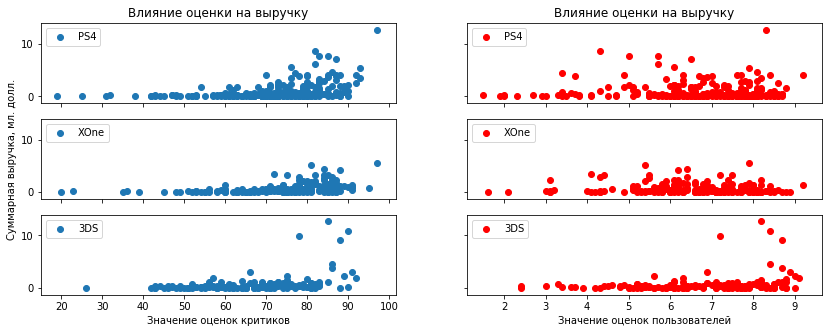

In [30]:
# визуализируем данные
fig, ax = plt.subplots(nrows=3, ncols=2, sharex='col', sharey=True, figsize=(14, 5))

list_platform = ['PS4', 'XOne', '3DS']

for item in range(len(list_platform)):
    ax[item, 0].scatter(df_selected.query('platform == @list_platform[@item]')['critic_score'],
                        df_selected.query('platform == @list_platform[@item]')['total_sales'], label=list_platform[item])
    ax[item, 1].scatter(df_selected.query('platform == @list_platform[@item]')['user_score'],
                        df_selected.query('platform == @list_platform[@item]')['total_sales'], label=list_platform[item], c='red')
    ax[item, 0].legend(loc='upper left')
    ax[item, 1].legend(loc='upper left')


ax[0, 0].set_title('Влияние оценки на выручку')
ax[0, 1].set_title('Влияние оценки на выручку')
ax[1, 0].set_ylabel('Суммарная выручка, мл. долл.')
ax[2, 0].set_xlabel('Значение оценок критиков')
ax[2, 1].set_xlabel('Значение оценок пользователей')


plt.show()

Влияние оценок критиков и пользователей характерно отражается на суммарной выручке самых популярных платформ. Продажи растут при оценках критиков близких к максимальным. Оценки пользователей начинают влиять на рост продаж, начиная с первой четверти значений своей шкалы.

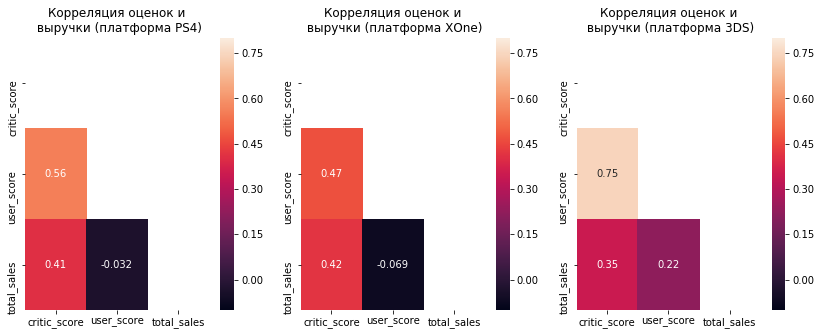

In [31]:
# определяем коэффициенты корреляции (платформа PS4)
corr_PS4 = df_selected.query('platform == "PS4"')[['critic_score', 'user_score', 'total_sales']].corr()
corr_XOne = df_selected.query('platform == "XOne"')[['critic_score', 'user_score', 'total_sales']].corr()
corr_3DS = df_selected.query('platform == "3DS"')[['critic_score', 'user_score', 'total_sales']].corr()

# визуализируем полученные данные в виде тепловых карт (платформы 'PS4', 'XOne' и '3DS')
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

sns.heatmap(corr_PS4, annot=True, mask=np.triu(corr_PS4), ax=ax[0], vmin=-0.1, vmax=0.8)
sns.heatmap(corr_XOne, annot=True, mask=np.triu(corr_XOne), ax=ax[1], vmin=-0.1, vmax=0.8)
sns.heatmap(corr_3DS, annot=True, mask=np.triu(corr_3DS), ax=ax[2], vmin=-0.1, vmax=0.8)

ax[0].set_title('Корреляция оценок и\n выручки (платформа PS4)')
ax[1].set_title('Корреляция оценок и\n выручки (платформа XOne)')
ax[2].set_title('Корреляция оценок и\n выручки (платформа 3DS)')


plt.show()

Корреляция между оценками критиков, пользователей и общими продажами демонстрирует схожее поведение для игровых платформ `PS4` и `XOne`.

Для платформы `3DS` характерна очень слабая прямая корреляция между оценками пользователей и общими продажами. При этом прослеживается умеренная корреляция между оценками пользователей и критиков.

**п. 3.9 Распределение игр по жанрам**

In [32]:
# сгруппируем данные о продажах по жанрам игр
genre_total_sales = pd.pivot_table(df_selected, index='genre', values='total_sales',
                                   aggfunc='sum').sort_values(by='total_sales').reset_index()

genre_total_sales

,genre,total_sales
0,Strategy,73.14
1,Puzzle,89.92
2,Adventure,141.35
3,Fighting,191.42
4,Simulation,220.65
5,Platform,279.74
6,Racing,299.09
7,Role-Playing,522.40
8,Misc,554.86
9,Shooter,717.04


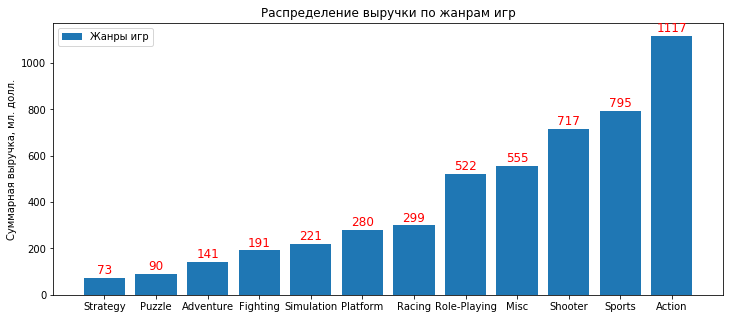

In [33]:
# визуализируем полученные в сводной таблице данные
fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(genre_total_sales['genre'], genre_total_sales['total_sales'], label='Жанры игр')

for p in ax.patches:
    x = p.get_x()
    h = p.get_height()
    w = p.get_width()
    ax.annotate(f'{h:.0f}\n', (x + w/2, h), ha='center', va='center', size=12, color='red')


ax.set_title('Распределение выручки по жанрам игр')
ax.set_ylabel('Суммарная выручка, мл. долл.')
ax.legend()
    
plt.show()

Распределение самых доходных жанров игр представлено на диаграмме выше. Следует отметить, что с многократным отрывом лидирую жанры, которые виртуально вовлекают игрока в активные действия (бегать, прыгать и т.д.). Жанры, ориентированные по большей части на сконцентрированный мыслительный процесс, приносят меньше всего прибыли.

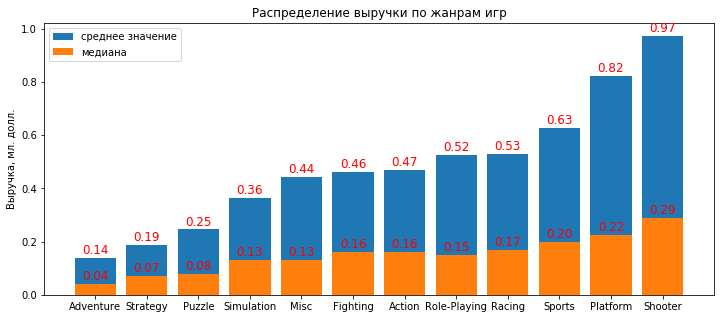

In [34]:
# сгруппируем данные о средних и медианных значениях продаж по жанрам игр
genre_total_sales_extended = pd.pivot_table(df_selected, index='genre', values='total_sales',
                                   aggfunc=['mean','median']).sort_values(by=('mean', 'total_sales')).reset_index()


# визуализация данных из сводной таблицы 'genre_total_sales_extended'
fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(genre_total_sales_extended['genre'], genre_total_sales_extended['mean']['total_sales'], label='среднее значение')
ax.bar(genre_total_sales_extended['genre'], genre_total_sales_extended['median']['total_sales'], label='медиана')

for p in ax.patches:
    x = p.get_x()
    h = p.get_height()
    w = p.get_width()
    ax.annotate(f'{h:.2f}\n', (x + w/2, h), ha='center', va='center', size=12, color='red')

ax.set_title('Распределение выручки по жанрам игр')
ax.set_ylabel('Выручка, мл. долл.')
ax.legend()
    
plt.show()

### Выводы

В данном разделе были получены данные о годовом объеме продаж игр. Была получена сводная информация об активном цикле присутствия игровой платформы на рынке – это в среднем приблизительно 8-12 лет. Выполнен прогноз популярности игровых платформ на предстоящий период. Исходя из имеющихся данных наибольшей популярностью будут пользоваться платформы `PS4`, `XOne` и `3DS`. Установлено, что оценки критиков и пользователей влияют на рост продаж, сохраняя приблизительно схожие закономерности. Выявлены наиболее востребованные жанры игр – с большим отрывом лидируют вовлекающие игрока в активные виртуальные физические действия.

## Портрет пользователя каждого региона

**п. 4.1 Самые популярные платформы (топ-5)**

In [35]:
# датафрейм с учетом нового актуального периода
df_corrected = df.query('2011 <= year_of_release <= 2016')

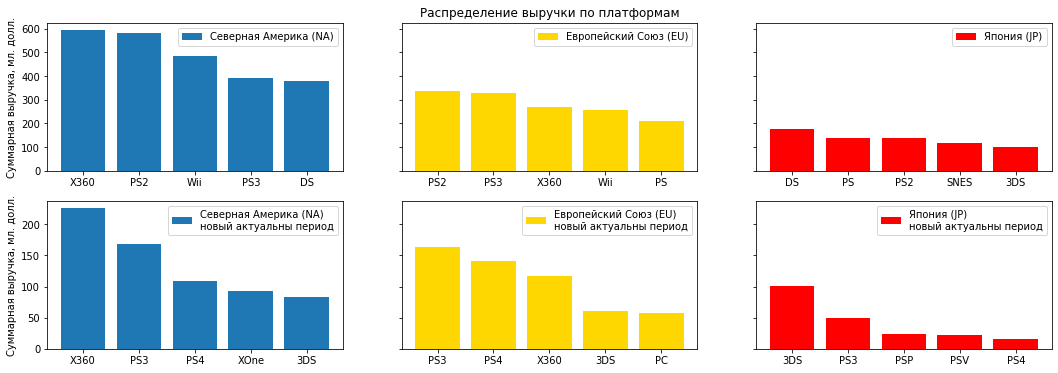

In [36]:
df_na_platform = pd.pivot_table(df, index='platform', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales',
                                ascending=False).reset_index(drop=True).head(5)
df_eu_platform = pd.pivot_table(df, index='platform', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales',
                                ascending=False).reset_index(drop=True).head(5)
df_jp_platform = pd.pivot_table(df, index='platform', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales',
                                ascending=False).reset_index(drop=True).head(5)


fig, ax = plt.subplots(nrows=2, ncols=3, sharey='row', figsize=(18, 6))
ax[0, 0].bar(df_na_platform['platform'], df_na_platform['na_sales'], label='Северная Америка (NA)')
ax[0, 1].bar(df_eu_platform['platform'], df_eu_platform['eu_sales'], label='Европейский Союз (EU)', color='gold')
ax[0, 2].bar(df_jp_platform['platform'], df_jp_platform['jp_sales'], label='Япония (JP)', color='red')


# сформируем сводную таблицу для региона 'NA'
df_na_platform_corrected = pd.pivot_table(df_corrected, index='platform', values='na_sales',
                                aggfunc='sum').reset_index().sort_values(by='na_sales',
                                ascending=False).reset_index(drop=True).head(5)
# сформируем сводную таблицу для региона 'EU'
df_eu_platform_corrected = pd.pivot_table(df_corrected, index='platform', values='eu_sales',
                                aggfunc='sum').reset_index().sort_values(by='eu_sales',
                                ascending=False).reset_index(drop=True).head(5)
# сформируем сводную таблицу для региона 'JP'
df_jp_platform_corrected = pd.pivot_table(df_corrected, index='platform', values='jp_sales',
                                aggfunc='sum').reset_index().sort_values(by='jp_sales',
                                ascending=False).reset_index(drop=True).head(5)

# визуализируем данные из сводных таблиц, которые получены на предыдущем этапе
ax[1, 0].bar(df_na_platform_corrected['platform'], df_na_platform_corrected['na_sales'], label='Северная Америка (NA)\nновый актуальны период')
ax[1, 1].bar(df_eu_platform_corrected['platform'], df_eu_platform_corrected['eu_sales'], label='Европейский Союз (EU)\nновый актуальны период', color='gold')
ax[1, 2].bar(df_jp_platform_corrected['platform'], df_jp_platform_corrected['jp_sales'], label='Япония (JP)\nновый актуальны период', color='red')
ax[0, 1].set_title('Распределение выручки по платформам')
ax[0, 0].set_ylabel('Суммарная выручка, мл. долл.')
ax[1, 0].set_ylabel('Суммарная выручка, мл. долл.')
ax[0, 0].legend()
ax[0, 1].legend()
ax[0, 2].legend()
ax[1, 0].legend()
ax[1, 1].legend()
ax[1, 2].legend()
plt.show()

У пользователей Северной Америки и Европейского Союза практически схожие предпочтения по качественному составу используемых платформ. По сравнению с Европейским Союзом и Японией, суммарная выручка платформ в Северной Америки заметно опережает другие регионы.

**п. 4.2 Самые популярные жанры (топ-5)**

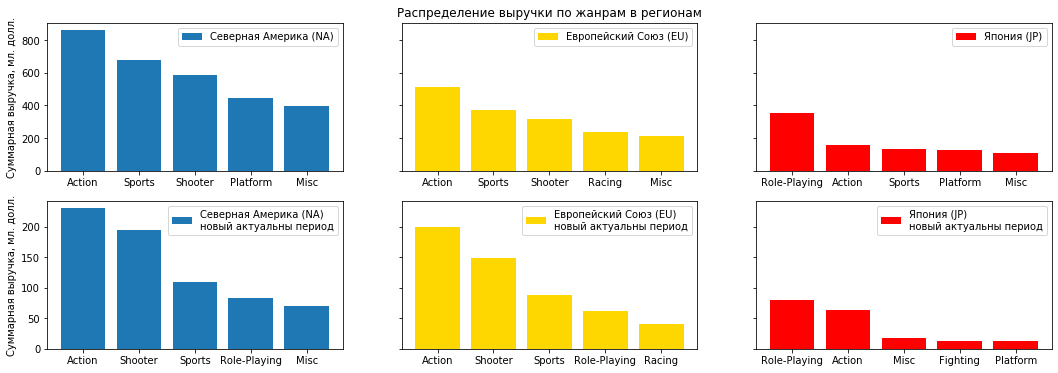

In [37]:
df_na_genre = pd.pivot_table(df, index='genre', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales',
                             ascending=False).reset_index(drop=True).head(5)
df_eu_genre = pd.pivot_table(df, index='genre', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales',
                             ascending=False).reset_index(drop=True).head(5)
df_jp_genre = pd.pivot_table(df, index='genre', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales',
                             ascending=False).reset_index(drop=True).head(5)

# визуализируем данные из сводных таблиц, которые получены на предыдущем этапе
fig, ax = plt.subplots(nrows=2, ncols=3, sharey='row', figsize=(18, 6))

ax[0, 0].bar(df_na_genre['genre'], df_na_genre['na_sales'], label='Северная Америка (NA)')
ax[0, 1].bar(df_eu_genre['genre'], df_eu_genre['eu_sales'], label='Европейский Союз (EU)', color='gold')
ax[0, 2].bar(df_jp_genre['genre'], df_jp_genre['jp_sales'], label='Япония (JP)', color='red')


df_na_genre_corrected = pd.pivot_table(df_corrected, index='genre', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales',
                             ascending=False).reset_index(drop=True).head(5)
df_eu_genre_corrected = pd.pivot_table(df_corrected, index='genre', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales',
                             ascending=False).reset_index(drop=True).head(5)
df_jp_genre_corrected = pd.pivot_table(df_corrected, index='genre', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales',
                             ascending=False).reset_index(drop=True).head(5)


# визуализируем данные из сводных таблиц, которые получены на предыдущем этапе
ax[1, 0].bar(df_na_genre_corrected['genre'], df_na_genre_corrected['na_sales'], label='Северная Америка (NA)\nновый актуальны период')
ax[1, 1].bar(df_eu_genre_corrected['genre'], df_eu_genre_corrected['eu_sales'], label='Европейский Союз (EU)\nновый актуальны период', color='gold')
ax[1, 2].bar(df_jp_genre_corrected['genre'], df_jp_genre_corrected['jp_sales'], label='Япония (JP)\nновый актуальны период', color='red')
ax[0, 1].set_title('Распределение выручки по жанрам в регионам')
ax[0, 0].set_ylabel('Суммарная выручка, мл. долл.')
ax[1, 0].set_ylabel('Суммарная выручка, мл. долл.')
ax[0, 0].legend()
ax[0, 1].legend()
ax[0, 2].legend()
ax[1, 0].legend()
ax[1, 1].legend()
ax[1, 2].legend()
plt.show()

В отношении жанров игр рассматриваемые регионы демонстрируют большее единство предпочтений. Северная Америка и Европейский Союз практические зеркально копируют друг друга. В силу культурных особенностей у Японии с заметным отрывом выделяется свой лидер.

**п. 4.3 Влияние рейтинга ESRB на продажи в отдельном регионе**

In [38]:
# замена пропусков в столбце 'rating' на пояснение 'No Data'
df_corrected['rating'] = df_corrected['rating'].fillna('No Data')

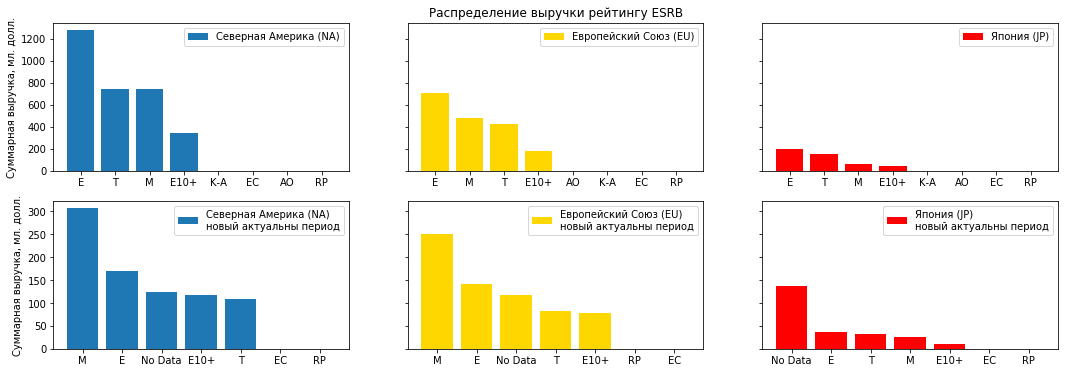

In [39]:
df_na_rating = pd.pivot_table(df, index='rating', values='na_sales',
                             aggfunc='sum').reset_index().sort_values(by='na_sales',
                             ascending=False).reset_index(drop=True)
df_eu_rating = pd.pivot_table(df, index='rating', values='eu_sales',
                             aggfunc='sum').reset_index().sort_values(by='eu_sales',
                             ascending=False).reset_index(drop=True)
df_jp_rating = pd.pivot_table(df, index='rating', values='jp_sales',
                             aggfunc='sum').reset_index().sort_values(by='jp_sales',
                             ascending=False).reset_index(drop=True)

# визуализируем данные из сводных таблиц, которые получены на предыдущем этапе
fig, ax = plt.subplots(nrows=2, ncols=3, sharey='row', figsize=(18, 6))

ax[0, 0].bar(df_na_rating['rating'], df_na_rating['na_sales'], label='Северная Америка (NA)')
ax[0, 1].bar(df_eu_rating['rating'], df_eu_rating['eu_sales'], label='Европейский Союз (EU)', color='gold')
ax[0, 2].bar(df_jp_rating['rating'], df_jp_rating['jp_sales'], label='Япония (JP)', color='red')


df_na_rating_corrected = pd.pivot_table(df_corrected, index='rating', values='na_sales',
                             aggfunc='sum').reset_index().sort_values(by='na_sales',
                             ascending=False).reset_index(drop=True)
df_eu_rating_corrected = pd.pivot_table(df_corrected, index='rating', values='eu_sales',
                             aggfunc='sum').reset_index().sort_values(by='eu_sales',
                             ascending=False).reset_index(drop=True)
df_jp_rating_corrected = pd.pivot_table(df_corrected, index='rating', values='jp_sales',
                             aggfunc='sum').reset_index().sort_values(by='jp_sales',
                             ascending=False).reset_index(drop=True)


# визуализируем данные из сводных таблиц, которые получены на предыдущем этапе
ax[1, 0].bar(df_na_rating_corrected['rating'], df_na_rating_corrected['na_sales'], label='Северная Америка (NA)\nновый актуальны период')
ax[1, 1].bar(df_eu_rating_corrected['rating'], df_eu_rating_corrected['eu_sales'], label='Европейский Союз (EU)\nновый актуальны период', color='gold')
ax[1, 2].bar(df_jp_rating_corrected['rating'], df_jp_rating_corrected['jp_sales'], label='Япония (JP)\nновый актуальны период', color='red')
ax[0, 1].set_title('Распределение выручки рейтингу ESRB')
ax[0, 0].set_ylabel('Суммарная выручка, мл. долл.')
ax[1, 0].set_ylabel('Суммарная выручка, мл. долл.')
ax[0, 0].legend()
ax[0, 1].legend()
ax[0, 2].legend()
ax[1, 0].legend()
ax[1, 1].legend()
ax[1, 2].legend()
plt.show()

Во всех регионах значимые группы игроков (в разных соотношениях) составляют одинаковые возрастные категории. Существенный и сравнимый по количеству для всех регионов составляет пласт игр без указания конкретного рейтинга `No Data` по `ESRB`.

### Выводы

В ходе работы с данным в этом разделе установлено, что предпочтения в каждом регионе по платформам сильно разнятся, набор жанров игр выявил влияние значимых культурных особенностей Японии, возрастные группы игроков схожи по распределению составов, но существенно отличаются численностью.

## Проверка статистических гипотез

**п. 5.1 Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые**

Формулировка нулевой `H0` и альтернативной `H1` гипотез:
* H0: средние пользовательские рейтинги платформ `Xbox One` и `PC` равны
* H1: средние пользовательские рейтинги платформ `Xbox One` и `PC` не равны

In [40]:
# создаем датафрейм для платформы 'XOne'
df_XOne = df_corrected.query('platform == "XOne" & user_score.notna()')


# создаем датафрейм для платформы 'PC'
df_PC = df_corrected.query('platform == "PC" & user_score.notna()')

In [41]:
# вычисляем дисперсию для столбца 'user_score'
df_XOne['user_score'].var(ddof=1)

1.9069968429360695

In [42]:
# вычисляем дисперсию для столбца 'user_score'
df_PC['user_score'].var(ddof=1)

2.6014594525995176

Для проверки гипотез используется критерий t-критерий Стьюдента, т.к. исследуемые выборки не зависят друг от друга.

In [43]:
# заданное значение уровня значимости
alpha = 0.05


# поскольку дисперсии практически отличаются, устанавливаем параметр 'equal_var=True'
results = st.ttest_ind(df_XOne['user_score'],
                       df_PC['user_score'],
                       equal_var=False)

print('p-значение: ', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.6472796468613693
Не получилось отвергнуть нулевую гипотезу


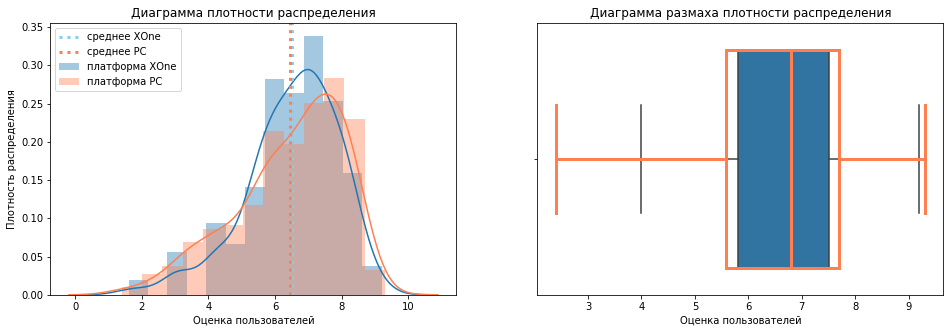

In [44]:
# визуализация данных
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

sns.distplot(df_XOne['user_score'], ax=ax[0], label='платформа XOne')
sns.boxplot(df_XOne['user_score'], ax=ax[1], showfliers=False)

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'coral'},
    'medianprops':{'color':'coral'},
    'whiskerprops':{'color':'coral'},
    'capprops':{'color':'coral'},
    'flierprops':{'markerfacecolor':'none', 'markeredgecolor':'coral'}
}

sns.distplot(df_PC['user_score'], ax=ax[0], label='платформа PC', color="coral")
sns.boxplot(df_PC['user_score'], ax=ax[1], linewidth=3, **PROPS, showfliers=False)

ax[0].axvline(df_XOne['user_score'].mean(), linewidth=3, color='skyblue', ls=':', label='среднее XOne')
ax[0].axvline(df_PC['user_score'].mean(), linewidth=3, color='coral', ls=':', label="среднее PC")

ax[0].set(title='Диаграмма плотности распределения')
ax[1].set(title='Диаграмма размаха плотности распределения')
ax[0].set_xlabel('Оценка пользователей')
ax[1].set_xlabel('Оценка пользователей')
ax[0].set_ylabel('Плотность распределения')
ax[0].legend()

plt.show()

В соответствии с численной характеристикой p-значение нулевая гипотеза принимается. Средние пользовательские рейтинги платформ `Xbox One` и `PC` не отличаются.

Аналогичный вывод можно сделать из визуализации диаграмм. Средние значения расположены близко друг к другу.

**п. 5.2 Средние пользовательские рейтинги жанров `Action` и `Sports` разные**

Формулировка нулевой `H0` и альтернативной `H1` гипотез:
* H0: средние пользовательские рейтинги жанров `Action` и `Sports` равны
* H1: средние пользовательские рейтинги платформ `Action` и `Sports` не равны

In [45]:
# создаем датафрейм для жанра 'Action'
df_Action = df_corrected.query('genre == "Action" & user_score.notna()')


# создаем датафрейм для жанра 'Sports'
df_Sports = df_corrected.query('genre == "Sports" & user_score.notna()')

In [46]:
# вычисляем дисперсию для столбца 'user_score'
df_Action['user_score'].var(ddof=1)

1.8136182172298219

In [47]:
# вычисляем дисперсию для столбца 'user_score'
df_Sports['user_score'].var(ddof=1)

2.8825095404015264

Для проверки гипотез используется критерий t-критерий Стьюдента, т.к. исследуемые выборки не зависят друг от друга.

In [48]:
# заданное значение уровня значимости
alpha = 0.05


# поскольку дисперсии практически не отличаются, устанавливаем параметр 'equal_var=True'
results = st.ttest_ind(df_Action['user_score'],
                       df_Sports['user_score'],
                       equal_var=True)

print('p-значение: ', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.147206374856738e-24
Отвергаем нулевую гипотезу


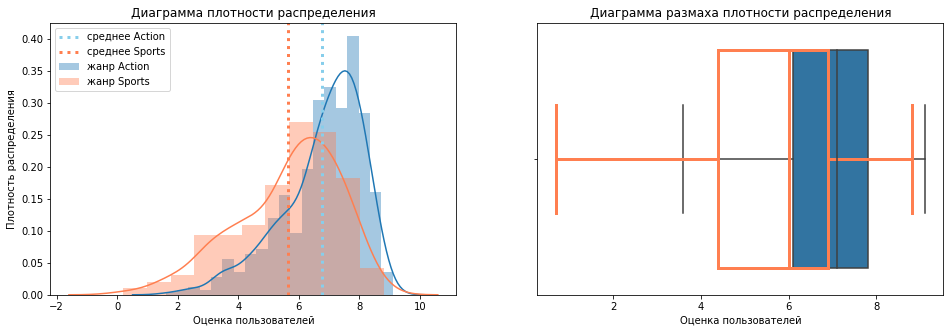

In [49]:
# визуализация данных
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

sns.distplot(df_Action['user_score'], ax=ax[0], label='жанр Action')
sns.boxplot(df_Action['user_score'], ax=ax[1], showfliers=False)

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'coral'},
    'medianprops':{'color':'coral'},
    'whiskerprops':{'color':'coral'},
    'capprops':{'color':'coral'},
    'flierprops':{'markerfacecolor':'none', 'markeredgecolor':'coral'}
}

sns.distplot(df_Sports['user_score'], ax=ax[0], label='жанр Sports', color="coral")
sns.boxplot(df_Sports['user_score'], ax=ax[1], linewidth=3, **PROPS, showfliers=False)

ax[0].axvline(df_Action['user_score'].mean(), linewidth=3, color='skyblue', ls=':', label='среднее Action')
ax[0].axvline(df_Sports['user_score'].mean(), linewidth=3, color='coral', ls=':', label="среднее Sports")

ax[0].set(title='Диаграмма плотности распределения')
ax[1].set(title='Диаграмма размаха плотности распределения')
ax[0].set_xlabel('Оценка пользователей')
ax[1].set_xlabel('Оценка пользователей')
ax[0].set_ylabel('Плотность распределения')
ax[0].legend()

plt.show()

В соответствии с численной характеристикой p-значение нулевая гипотеза не принимается. Средние пользовательские рейтинги жанров `Action` и `Sports` отличаются.

Аналогичный вывод можно сделать из визуализации диаграмм. Средние значения разнесены.

### Вывод

В данном разделе была выполнена проверка двух статистических гипотез о равенстве средних пользовательских рейтингов для платформ и жанров. Полученные данные о величинах p-значение, а также выполненная визуализация подтверждают выводы: средние пользовательские рейтинги рассматриваемых платформ отличаются, средние пользовательские рейтинги изучаемых игровых жанров схожи.

## Общий вывод

Активный жизненный цикл игровой платформы составляет приблизительно 8-12 лет. Параллельно на рынке присутствует несколько брендов, что способствует конкуренции и развитию технологий.

Наблюдается падение потребительского спроса на игровые платформы. При неизменном снижении спроса лидерство могут сохранить платформы `PS4`, `XOne` и `3DS`.

На рост продаж существенное влияние оказывают высокие оценки критиков, начиная с последней четверти оценочной шкалы (приблизительно 60 баллов и более). Оценки пользователей начинают воздействовать на спрос, начиная с первой четверти оценочной шкалы (приблизительно 3,5 балла и более). Однако характер спроса в последнем случае более хаотичный.

Самые продаваемые жанры игр ориентированы на виртуальное вовлечение в физическую активность `Action`, `Sports` и `Shooter`. Игры, требующие концентрации и неспешных размышлений в аутсайдерах `Strategy`, `Puzzle` и `Adventure`. Если оценивать средние и медианные значения, тройка лидеров меняется на жанры – `Shooter`, `Platform` и `Sports`. 

Для рассматриваемых регионов предпочтения по игровым платформам между Северной Америкой и Европейским Союзом по качественному составу практически идентичный (совпадение по 4 из 5 платформ – `X360`, `PS3`, `PS4` и `3DS`). В Северной Америке и Европейском Союзе симметрично лидируют жанры `Action`, `Sports`, `Shooter` и `Role-Playing`. В Японии среди лидеров жанры `Role-Playing` и `Action`. Возрастной состав идентичен по группам, но отличается численно. Для всех регионов характерно полное отсутствие игроков в группах `EC` и `RP`. Существенной и идентичной по численности для каждого региона оказалась группа `No Data`, для которой отсутствует рейтинг ESRB. Если дополнить данные из внешних источников, это поможет уточнить качественный и количественный состав остальных возрастных категорий.

По результатам проверки статистических гипотез было установлено: средние оценки пользователей для исследуемых игровых платформ сопоставимы; средние оценки пользователей для игровых жанров отличаются.